In [7]:
import numpy as np
from logr_model import logistic_regression_predict
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset from sklearn (or load_digits if MNIST is too large)
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the parameters for the logistic regression model
max_iter = 20
learning_rate = 0.05
regularization = None
reg_lambda = 0.0
logreg_type = 'softmax'

# Use our Logistic Regression model
y_pred = logistic_regression_predict(X_train, y_train, X_test, max_iter=max_iter, learning_rate=learning_rate, regularization=regularization, reg_lambda=reg_lambda, type=logreg_type)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.8862142857142857
Precision (macro): 0.8853723951900576
Recall (macro): 0.8847057417620553


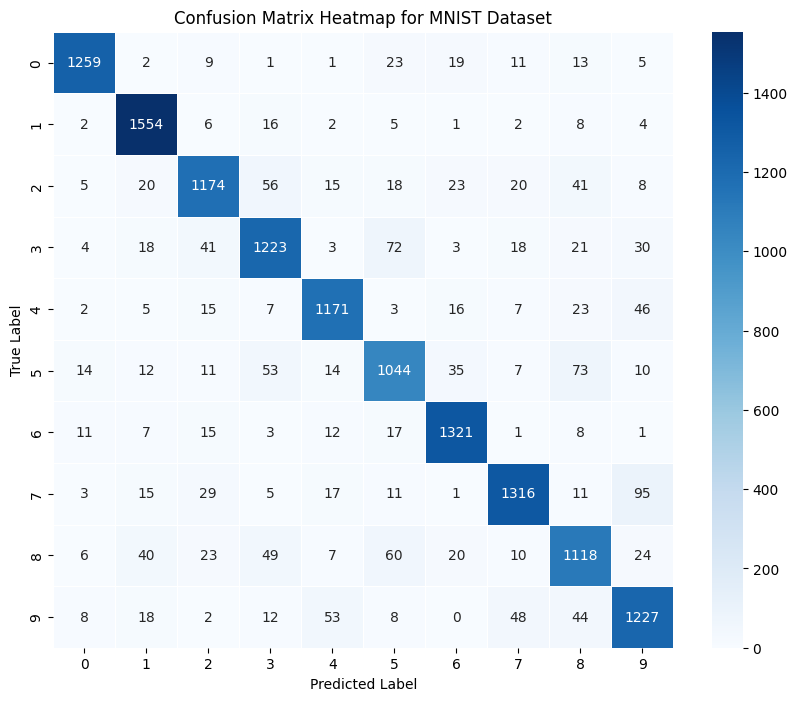

In [5]:
# Print out the evaluation metrics
print("Accuracy:", accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=True, linewidths=0.5)
plt.title('Confusion Matrix Heatmap for MNIST Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy (scikit-learn): 0.9155
Precision (macro) (scikit-learn): 0.9146704786306131
Recall (macro) (scikit-learn): 0.914195017633477


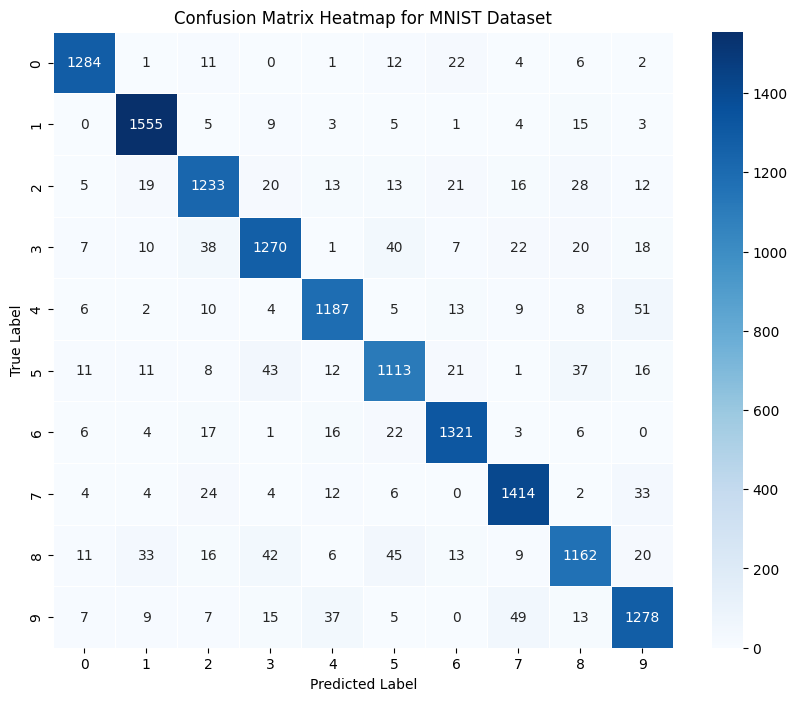

In [10]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')

model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Calculate evaluation metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='macro')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='macro')
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

# Print out evaluation metrics
print("Accuracy (scikit-learn):", accuracy_sklearn)
print("Precision (macro) (scikit-learn):", precision_sklearn)
print("Recall (macro) (scikit-learn):", recall_sklearn)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sklearn, annot=True, cmap='Blues', fmt='g', cbar=True, linewidths=0.5)
plt.title('Confusion Matrix Heatmap for MNIST Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()